## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Download dataset from kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d ruhuasiyu/pokemon

 99% 329M/331M [00:15<00:00, 25.5MB/s]
100% 331M/331M [00:15<00:00, 22.0MB/s]


## Extracting ZipFile

In [9]:
import zipfile
zip_ref = zipfile.ZipFile("/content/pokemon.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [10]:
classes = os.listdir("/content/pokeman")
classes

['pikachu', 'bulbasaur', 'mewtwo', 'charmander', 'squirtle']

In [12]:
print("Training Data:")
for f in classes:
    path = "/content/pokeman/" + f
    print(f"{f} - {len(os.listdir(path))}")

Training Data:
pikachu - 234
bulbasaur - 234
mewtwo - 239
charmander - 238
squirtle - 223


## Data Loading

In [13]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [14]:
from keras_preprocessing import image

In [15]:
train_data = [] # X
train_labels = [] # Y

for category in classes:
    folder = f"/content/pokeman/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"

        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
len(train_data)

1168

In [17]:
len(train_labels)

1168

In [18]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [19]:
train_data.shape

(1168, 100, 100, 3)

In [20]:
train_labels.shape

(1168,)

In [25]:
train_data = train_data.reshape(len(train_data), 30000)
train_data.shape

(1168, 30000)

In [28]:
category2label = {'bulbasaur':0, 'charmander':1, 'mewtwo':2, 'pikachu':3, 'squirtle':4}
label2category = {0:'bulbasaur', 1:'charmander', 2:'mewtwo', 3:'pikachu', 4:'squirtle'}

In [29]:
train_labels = np.array([category2label[label] for label in train_labels])

In [30]:
train_labels.shape

(1168,)

In [31]:
from keras.utils import to_categorical

In [32]:
train_labels = to_categorical(train_labels)

In [33]:
train_labels.shape

(1168, 5)

In [34]:
train_labels[:5]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [35]:
train_labels[-5:]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [36]:
from keras.layers import Dense
from keras import Sequential

In [37]:
features = train_data.shape[1]

## Model

In [86]:
model = Sequential()
model.add( Dense(units=2048, activation='relu', input_shape=(features,)) )
model.add( Dense(units=2048, activation='relu' ) )
model.add( Dense(units=1024, activation='relu' ) )
model.add( Dense(units=1024, activation='relu' ) )
model.add( Dense(units=512, activation='relu' ) )
model.add( Dense(units=512, activation='relu' ) )
model.add( Dense(units=256, activation='relu' ) )
model.add( Dense(units=128, activation='relu' ) )
model.add( Dense(units=64, activation='relu' ) )
model.add( Dense(units=5, activation='softmax' ) )

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [74]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1024)              30721024  
                                                                 
 dense_43 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_44 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_45 (Dense)            (None, 512)               524800    
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dense_47 (Dense)            (None, 256)               131328    
                                                                 
 dense_48 (Dense)            (None, 128)              

In [90]:
model.fit(train_data, train_labels, batch_size=32, epochs=23)

Epoch 1/23
37/37 [==============================] - 1s 29ms/step - loss: 0.3151 - accuracy: 0.8896
Epoch 2/23
37/37 [==============================] - 1s 23ms/step - loss: 0.2135 - accuracy: 0.9229
Epoch 3/23
37/37 [==============================] - 1s 24ms/step - loss: 0.1122 - accuracy: 0.9632
Epoch 4/23
37/37 [==============================] - 1s 24ms/step - loss: 0.4693 - accuracy: 0.8408
Epoch 5/23
37/37 [==============================] - 1s 24ms/step - loss: 0.3953 - accuracy: 0.8793
Epoch 6/23
37/37 [==============================] - 1s 25ms/step - loss: 0.1576 - accuracy: 0.9538
Epoch 7/23
37/37 [==============================] - 1s 25ms/step - loss: 0.2708 - accuracy: 0.9015
Epoch 8/23
37/37 [==============================] - 1s 22ms/step - loss: 0.2135 - accuracy: 0.9324
Epoch 9/23
37/37 [==============================] - 1s 22ms/step - loss: 0.1676 - accuracy: 0.9401
Epoch 10/23
37/37 [==============================] - 1s 22ms/step - loss: 0.2148 - accuracy: 0.9332
Epoch 11/

## Testing

In [91]:
test_img = "/content/char.jpg"

img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

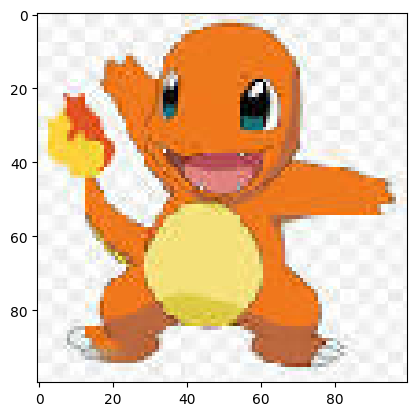

In [92]:
plt.imshow(img.astype('int'));

In [93]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [94]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 92ms/step


'charmander'